## Data Story: Does education help explain racial and gender-based income disparities?

We will try to answer this question using data collected from U.S. census records. Each income earner in the data set is classed as a high earner (if their income is greater than 50,000 per year), or a low earner otherwise.

Warning: this data set was compiled in 1996, so results may not apply today! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
## Create a Boolean indicator variable to check whether someone is a high earner.
## This is makes finding the proportion of high earners by group easier.
df['indicator'] = df['income'] == '>50K'

### Proportion of high earners by race and gender

The graph below shows the proportion of people in each race and gender category who are high earners. There are large disparities between racial categories. For example, Asian Americans are more than twice as likely to be high earners as Native Americans. 

Within each racial group, there is a large gender disparity. Men earn roughly three times as much as women in each group.

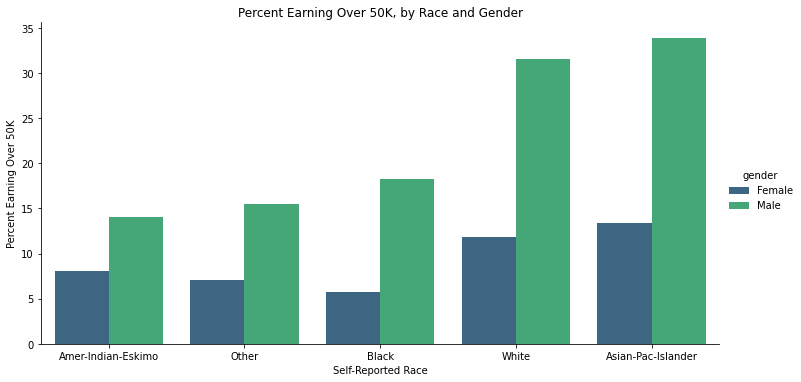

In [4]:
## Plot a bar graph showing the percentage of people in each
## race and gender category who are high earners.
grouped_df = df.groupby(['race', 'gender'])['indicator'].mean().reset_index()
grouped_df.indicator = grouped_df.indicator*100
sns.catplot(kind='bar', data=grouped_df,
            x ='race', y='indicator', hue='gender',
            palette='viridis',
            order = ['Amer-Indian-Eskimo', 'Other', 'Black', 
                     'White', 'Asian-Pac-Islander'],
           height=5, aspect=2)
plt.xlabel('Self-Reported Race')
plt.ylabel('Percent Earning Over 50K')
plt.title('Percent Earning Over 50K, by Race and Gender')
plt.show()

### High earners by educational attainment

Could some of the demographic differences we observe be due to differences in level of education? 
To investigate, we look at the proportion of people at each level of education who are high earners. 

As the graph below shows, the odds of being a high earner increase with education. College graduates are more than three times as likely to be high earners as those with only a high school education.

In [5]:
## Clean the 'education' column, binning values into six categories.
df['education'].replace(to_replace=['Bachelors', 'Masters', 
                                    'Doctorate', 'Prof-school'], value='College-grad', inplace=True)
df['education'].replace(to_replace='Assoc.*$', value='Assoc', regex=True, inplace=True)
df['education'].replace(to_replace='[19].*', value='Some-HS', regex=True, inplace=True)
df['education'].replace(to_replace='[57P].*', value='No-HS', regex=True, inplace=True)

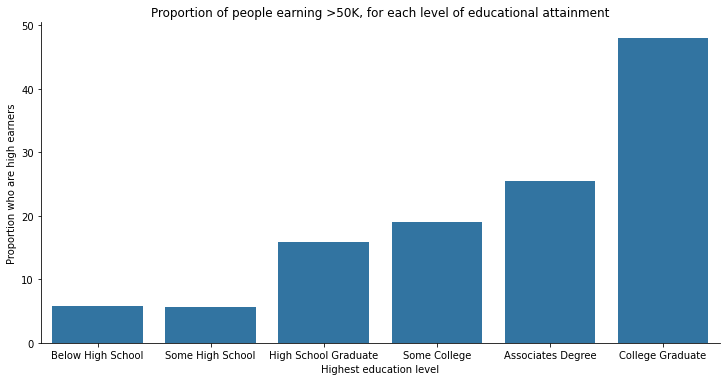

In [6]:
edu_df=df.groupby('education')['indicator'].mean().reset_index()
edu_df['indicator'] = edu_df['indicator']*100
edu_sorted = edu_df.set_index('education').loc[['No-HS', 'Some-HS', 'HS-grad', 
                                                'Some-college', 'Assoc', 'College-grad']]
edu_sorted.reset_index(inplace=True)
sns.catplot(x='education', kind='bar', y='indicator', 
            height=5, aspect=2, color='tab:blue', data=edu_sorted)
plt.title("Proportion of people earning >50K, for each level of educational attainment")
plt.xlabel('Highest education level')
plt.ylabel('Proportion who are high earners')
plt.xticks([0,1,2,3,4,5], ['Below High School', 
                           'Some High School', 'High School Graduate',
                           'Some College', 'Associates Degree', 'College Graduate'])
plt.show()

The graph shows little difference between those with only primary-school education, and those with some high school. Similarly, having some college (without earning a degree) makes only a small difference. Going forward, we will group people into only four educational cateogiries, based on highest degree completed.

In [7]:
df['education'].replace(to_replace=['No-HS', 'Some-HS'], value='No degree', inplace=True)
df['education'].replace('Some-college', 'HS-grad', inplace=True)
df['education'].value_counts()

HS-grad         26662
College-grad    12110
No degree        6408
Assoc            3662
Name: education, dtype: int64

### Educational attainment by demographic group

In this section, to simplify the analysis, we will focus on Black and white adults--the two largest groups in the data set. We first compare educational attainments for Black and white adults. The chart below shows that White adults are more likely to finish high school, and more likely to graduate college. Since a degree increases the odds of being a high earner, this may partly explain why white adults are more likely to be high earners. Increasing educational opportunities for underrepresented groups could help reduce this inequity.

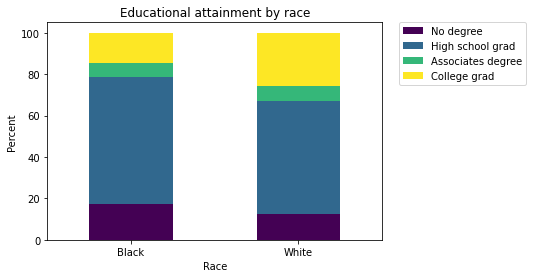

In [8]:
## Create stacked bar chart showing percentage in each of four
## education levels, for Black and white adults.
race_edu = df.loc[df['race'].isin(['Black', 'White']),['race', 'education']]
agg_race_edu = race_edu.groupby(['race', 'education']).size().unstack()
agg_race_edu
agg_race_edu = agg_race_edu.div(agg_race_edu.sum(axis=1), axis=0)*100
agg_race_edu = agg_race_edu.loc[:, ['No degree', 'HS-grad', 'Assoc', 'College-grad']]
agg_race_edu

agg_race_edu.plot(kind='bar', stacked=True, cmap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=['No degree', 
                                                                      'High school grad', 
                                                                      'Associates degree', 
                                                                      'College grad'])
plt.xticks(rotation=0)
plt.title('Educational attainment by race')
plt.ylabel('Percent')
plt.xlabel('Race')
plt.show()

If education helps explain disparities by race, what about gender? 
The graph below shows that there is little difference in educational attainment between Black men and Black women, or between white men and white women. The gender disparities within each racial group cannot be even partially explained by differences in education level.

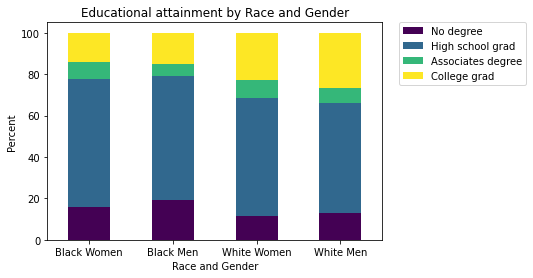

In [9]:
## Make a stacked bar plot showing the percentage in each education category
## for Black and white American adults, by gender.
race_gender_edu = df.loc[df['race'].isin(['Black', 'White']), ['race', 'gender', 'education']]
agg_race_gender_edu = race_gender_edu.groupby(['race', 'gender', 'education']).size().unstack()
agg_race_gender_edu = agg_race_gender_edu.div(agg_race_gender_edu.sum(axis=1), axis=0)*100
agg_race_gender_edu = agg_race_gender_edu.loc[:, ['No degree', 'HS-grad', 'Assoc', 'College-grad']]
my_labels = agg_race_gender_edu.index.to_flat_index()
labels = [first + ' ' + second for (first, second) in my_labels]
labels = [label.replace('Female', 'Women') for label in labels]
labels = [label.replace('Male', 'Men') for label in labels]

agg_race_gender_edu.plot(kind='bar', stacked=True, cmap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=['No degree', 
                                                                      'High school grad', 
                                                                      'Associates degree', 
                                                                      'College grad'])
plt.xticks(rotation=0)
plt.title('Educational attainment by Race and Gender')
plt.ylabel('Percent')
plt.xlabel('Race and Gender')
plt.xticks([0, 1, 2, 3], labels)
plt.show()

### Conclusion

From the graphs, it is clear that there are significant difference in income distribution based on race and gender. Differences in educational attainment may help explain the gaps between racial groups. College graduates are much more likely to be high earners, and white adults are more likely than Black adults to be college graduates. Increasing access to higher education for underrepresented groups could potentially help decrease income disparities.

Interestingly, education does not seem to be a factor in gender disparities. White women are only slightly less educated than white men, and black women are slightly more educated than black men. Other factors must be responsible for the gender gap in earnings, and other approaches will be needed to reduce those gaps.